In [373]:
import h5py
import numpy as np

f = h5py.File('./archive (1)/all_patches.hdf5','r')
print(list(f.keys()))

ct_slices = f['ct_slices']
slice_class = f['slice_class']

ct_slices = np.array(ct_slices)
slice_class = np.array(slice_class)
print(ct_slices.shape)
print(slice_class.shape)
print(ct_slices[1].min())

['ct_slices', 'slice_class']
(6691, 64, 64)
(6691, 1)
-1024.0


320.0
-1000.0


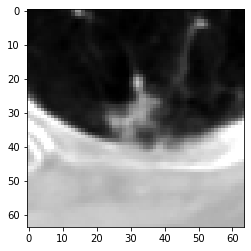

In [374]:
import pylab
ct_slices = np.clip(ct_slices, -1000,320)
print(ct_slices.max())
print(ct_slices.min())

pylab.imshow(ct_slices[5], cmap=pylab.cm.gray)  
pylab.show()



In [375]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
ct_slices = ct_slices.reshape(6691,64,64,1)
#slice_class = slice_class(6691,64,64,1)

X_train, X_test, y_train, y_test = train_test_split(ct_slices, slice_class, test_size=0.33, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)


print(X_train.shape)
print(y_train.shape)

(4482, 64, 64, 1)
(4482, 2)


In [394]:
from keras.applications.resnet50 import ResNet50
#from keras.applications import MobileNetV2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import backend as K
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
import torch.nn.functional as F
import numpy as np
import skimage.transform
import keras

#conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(64,64,1)))
# model.add(Dropout(0.2))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(MyCustomLayer(32,use_bias = False))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# # model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# # model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])
#kernel_regularizer=l2(1e-2)
# model.fit(x_train, y_train,
#           batch_size=64,
#           epochs=10,
#           verbose=1,
#           validation_data=(x_test, y_test))
history = model.fit(
        X_train,y_train,
        batch_size=100,
        epochs=100,
        validation_data=(X_test, y_test))

Epoch 1/100
45/45 [==============================] - 24s 519ms/step - loss: 7.2363 - accuracy: 0.5336 - val_loss: 0.6678 - val_accuracy: 0.6039
Epoch 2/100
45/45 [==============================] - 22s 500ms/step - loss: 0.6517 - accuracy: 0.6349 - val_loss: 0.6595 - val_accuracy: 0.6252
Epoch 3/100
45/45 [==============================] - 22s 499ms/step - loss: 0.6389 - accuracy: 0.6532 - val_loss: 0.6398 - val_accuracy: 0.6351
Epoch 4/100
45/45 [==============================] - 23s 500ms/step - loss: 0.6222 - accuracy: 0.6591 - val_loss: 0.6127 - val_accuracy: 0.6772
Epoch 5/100
45/45 [==============================] - 23s 502ms/step - loss: 0.5957 - accuracy: 0.6945 - val_loss: 0.6112 - val_accuracy: 0.6446
Epoch 6/100
45/45 [==============================] - 22s 501ms/step - loss: 0.5914 - accuracy: 0.6803 - val_loss: 0.6100 - val_accuracy: 0.6650
Epoch 7/100
45/45 [==============================] - 22s 498ms/step - loss: 0.5891 - accuracy: 0.6888 - val_loss: 0.6004 - val_accuracy:

45/45 [==============================] - 22s 497ms/step - loss: 0.0962 - accuracy: 0.9666 - val_loss: 0.3573 - val_accuracy: 0.8760
Epoch 58/100
45/45 [==============================] - 22s 500ms/step - loss: 0.0746 - accuracy: 0.9784 - val_loss: 0.3414 - val_accuracy: 0.8864
Epoch 59/100
45/45 [==============================] - 22s 493ms/step - loss: 0.0637 - accuracy: 0.9814 - val_loss: 0.4212 - val_accuracy: 0.8737
Epoch 60/100
45/45 [==============================] - 22s 496ms/step - loss: 0.0927 - accuracy: 0.9650 - val_loss: 0.3827 - val_accuracy: 0.8615
Epoch 61/100
45/45 [==============================] - 22s 498ms/step - loss: 0.0786 - accuracy: 0.9745 - val_loss: 0.3687 - val_accuracy: 0.8796
Epoch 62/100
45/45 [==============================] - 22s 495ms/step - loss: 0.0647 - accuracy: 0.9773 - val_loss: 0.3623 - val_accuracy: 0.8742
Epoch 63/100
45/45 [==============================] - 22s 495ms/step - loss: 0.0525 - accuracy: 0.9859 - val_loss: 0.4153 - val_accuracy: 0.872

In [395]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
global_average_pooling2d_9 ( (None, 64)               

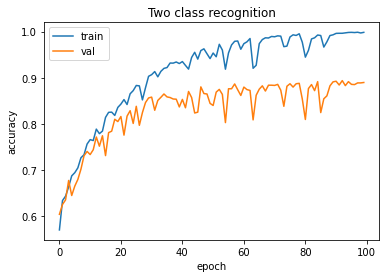

In [396]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Two class recognition')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [407]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()



In [414]:
def normalization(image):
    return (image - image.min())/(image.max() - image.min())

def gray_to_redblue(image):
    R,G,B = image[:,:,0], image[:,:,1], image[:,:,2]
    #grey = sum(pixel) // len(pixel)
    redvalue = 1 - R  # "darkness"
    bluevalue = B  # "brightness"
    image[:,:,0] = B
    image[:,:,1] = 0
    image[:,:,2] = 1-R
    return image# + alpha



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(16, 16)
(64, 64, 3)
(64, 64, 3)


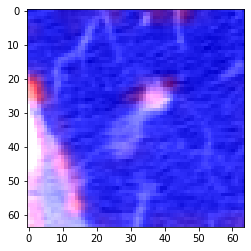

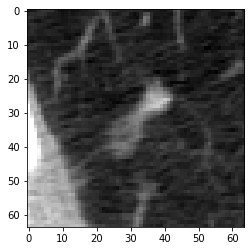

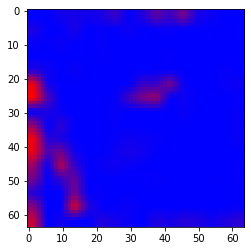

In [420]:
import cv2
from PIL import Image
from sklearn import preprocessing

def generate_CAM(image,layer):
    img_array = np.reshape(image,(1,64,64,1))
    preds = model.predict(img_array)
    H5py_cam = make_gradcam_heatmap(img_array,model,layer)
    print(H5py_cam.shape)
    heatmap = cv2.resize(H5py_cam,(img_array.shape[1],img_array.shape[2]))
    img_map = np.reshape(img_array,(64,64))
    heatmap = normalization(heatmap)
    img_map = normalization(img_map)
    heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    img_map = cv2.cvtColor(img_map,cv2.COLOR_GRAY2RGB)
    heatmap = gray_to_redblue(heatmap)
    #heatmap = cv2.cvtColor(heatmap,cv2.COLOR_GRAY2RGB)
    print(heatmap.shape)
    print(img_map.shape)
    combination = heatmap * 0.8 + img_map * 1

    plt.imshow(combination)
    plt.show()
    
    pylab.imshow(img_map, cmap=pylab.cm.gray)  
    pylab.show()
    pylab.imshow(heatmap, cmap=pylab.cm.jet)  
    pylab.show()
    
generate_CAM(ct_slices[378],'max_pooling2d_20')
    

In [422]:
from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,1)
print('')
print(classification_report(np.argmax(y_test,1),
                      y_pred))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1358
           1       0.86      0.85      0.86       851

    accuracy                           0.89      2209
   macro avg       0.88      0.88      0.88      2209
weighted avg       0.89      0.89      0.89      2209



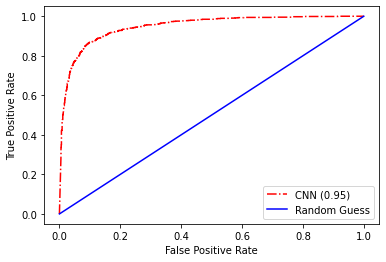

In [423]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(np.argmax(y_test, 1), y_pred_proba[:,1])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()